# json 파일 기반으로 그래프 시각화 하기

## matplotlib 시각화

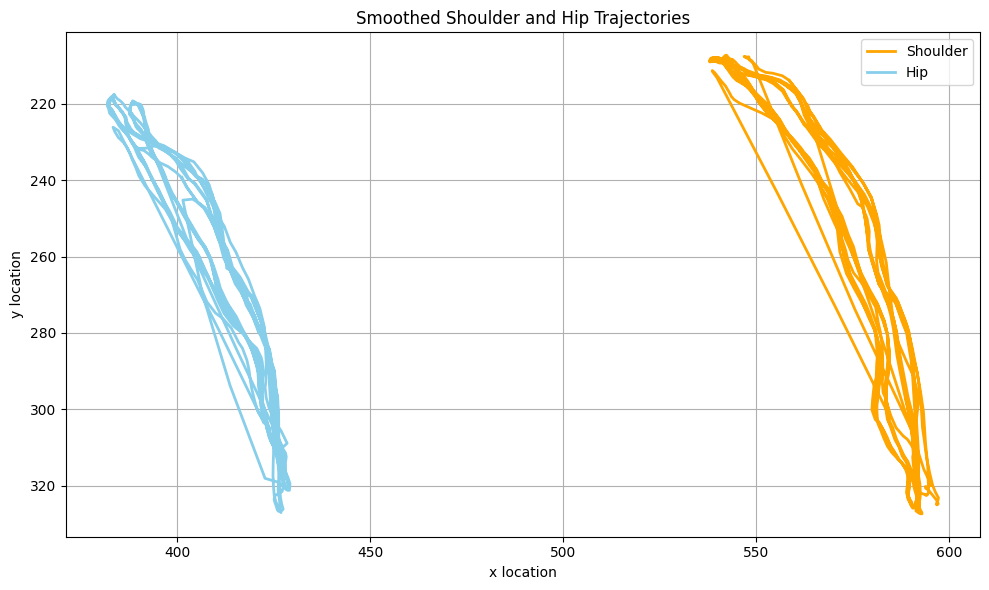

In [6]:
import json
import matplotlib.pyplot as plt

# JSON 파일 경로
json_path = "/Users/laxdin24/Documents/GitHub/MS_AI_SCHOOL_6/Project All/3차프로젝트/output_Pushup_test5.json"

# JSON 데이터 불러오기
with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# 어깨와 골반 좌표 추출
shoulder_x, shoulder_y = [], []
hip_x, hip_y = [], []

for frame in data:
    if "shoulder_xy" in frame and "hip_xy" in frame:
        sx, sy = frame["shoulder_xy"]
        hx, hy = frame["hip_xy"]
        shoulder_x.append(sx)
        shoulder_y.append(sy)
        hip_x.append(hx)
        hip_y.append(hy)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(shoulder_x, shoulder_y, label="Shoulder", color="orange", linewidth=2)
plt.plot(hip_x, hip_y, label="Hip", color="skyblue", linewidth=2)
plt.xlabel("x location")
plt.ylabel("y location")
plt.title("Smoothed Shoulder and Hip Trajectories")
plt.legend()
plt.gca().invert_yaxis()  # 영상 좌표계는 y축이 아래로 내려감
plt.grid(True)
plt.tight_layout()
plt.show()

## matplotlib시각화에 선형회귀 추가
* 추가된 선형회귀로 기울기값 알 수 있음

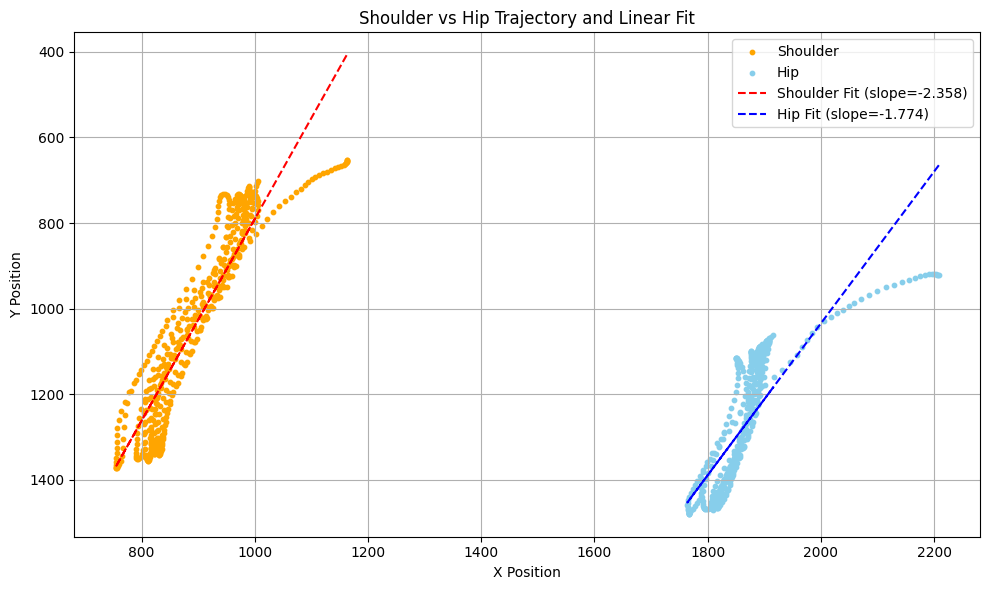

In [1]:
import json
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# JSON 파일 로드
with open("/Users/laxdin24/Desktop/Output_json/Nomal_test1.json", "r") as f:
    data = json.load(f)

# 어깨 및 골반 좌표 추출
shoulder = np.array([frame["shoulder_xy"] for frame in data])
hip = np.array([frame["hip_xy"] for frame in data])

# 이동 평균 함수 정의
def moving_average(points, k=5):
    if len(points) < k:
        return np.array(points)
    smoothed = []
    for i in range(len(points)):
        start = max(0, i - k//2)
        end = min(len(points), i + k//2 + 1)
        window = points[start:end]
        avg_x = np.mean([p[0] for p in window])
        avg_y = np.mean([p[1] for p in window])
        smoothed.append([avg_x, avg_y])
    return np.array(smoothed)

# 선형 회귀 함수
def fit_line(points):
    X = np.array(points[:, 0]).reshape(-1, 1)
    y = np.array(points[:, 1])
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    slope = model.coef_[0]
    return model, y_pred, slope

# 이동 평균 적용
shoulder_smooth = moving_average(shoulder)
hip_smooth = moving_average(hip)

# 선형 회귀
shoulder_model, shoulder_pred, shoulder_slope = fit_line(shoulder_smooth)
hip_model, hip_pred, hip_slope = fit_line(hip_smooth)

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(shoulder_smooth[:, 0], shoulder_smooth[:, 1], color='orange', label='Shoulder', s=10)
plt.scatter(hip_smooth[:, 0], hip_smooth[:, 1], color='skyblue', label='Hip', s=10)
plt.plot(shoulder_smooth[:, 0], shoulder_pred, color='red', linestyle='--', label=f'Shoulder Fit (slope={shoulder_slope:.3f})')
plt.plot(hip_smooth[:, 0], hip_pred, color='blue', linestyle='--', label=f'Hip Fit (slope={hip_slope:.3f})')
plt.gca().invert_yaxis()
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Shoulder vs Hip Trajectory and Linear Fit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()